In [ ]:
import numpy as np 
import pandas as pd
import csv
import io
from google.colab import files
uploaded = files.upload()
# d = pd.read_csv(io.BytesIO(uploaded['combined1.csv']))

features = []
names = []
# print(data)
with open('combined2.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
    features.append(np.array(row[0:]))
  
# print(uploaded['combined1.csv'])
# print(d)
features = np.array(features)
print(features)


Saving combined2.csv to combined2.csv
[['song_id' 'tempo' 'total_beats' ... 'frame_std' 'frame_var' 'label']
 ['1' '117.4538352' '143490' ... '1.092411264' '1.193362369' '3']
 ['2' '129.1992188' '164643' ... '4.649219877' '21.61524547' '3']
 ...
 ['1371' '151.9990809' '192409' ... '1.353077982' '1.830820026' '5']
 ['1372' '123.046875' '153763' ... '1.505449693' '2.266378777' '5']
 ['1373' '161.4990234' '195648' ... '1.413968933' '1.999308145' '5']]


In [ ]:

key = features[0]
features = features[1:,:]
labels = features[:,-1]
categories = list(set(labels))

features = features[:,:-1]
key = key[:-1]
print(features[1:])
# print(features)
print('Features -', features.shape, key)
print('Categories -', categories, len(categories))

[['2' '129.1992188' '164643' ... '8.467156463' '4.649219877'
  '21.61524547']
 ['3' '151.9990809' '199193' ... '2.594829932' '1.129928778'
  '1.276739044']
 ['4' '151.9990809' '161883' ... '8.168780045' '3.537997295'
  '12.51742486']
 ...
 ['1371' '151.9990809' '192409' ... '3.866122449' '1.353077982'
  '1.830820026']
 ['1372' '123.046875' '153763' ... '4.951655329' '1.505449693'
  '2.266378777']
 ['1373' '161.4990234' '195648' ... '4.410630385' '1.413968933'
  '1.999308145']]
Features - (1373, 55) ['song_id' 'tempo' 'total_beats' 'average_beats' 'chroma_stft_mean'
 'chroma_stft_std' 'chroma_stft_var' 'chroma_cq_mean' 'chroma_cq_std'
 'chroma_cq_var' 'chroma_cens_mean' 'chroma_cens_std' 'chroma_cens_var'
 'melspectrogram_mean' 'melspectrogram_std' 'melspectrogram_var'
 'mfcc_mean' 'mfcc_std' 'mfcc_var' 'mfcc_delta_mean' 'mfcc_delta_std'
 'mfcc_delta_var' 'rmse_mean' 'rmse_std' 'rmse_var' 'cent_mean' 'cent_std'
 'cent_var' 'spec_bw_mean' 'spec_bw_std' 'spec_bw_var' 'contrast_mean'
 'con

In [ ]:
labels_temp = []
for i in range(len(categories)):
    for label in labels:
        if label == categories[i]:
            labels_temp.append(i)
labels = np.array(labels_temp)
# print(labels)

In [ ]:
# Convert string features to number

features = features.astype(np.float)
print(features[0])
# print(type(features))
print(features.shape)

[ 1.00000000e+00  1.17453835e+02  1.43490000e+05  1.25868421e+03
  2.65287300e-01  3.07550399e-01  9.45872480e-02  4.76079086e-01
  2.68147429e-01  7.19030440e-02  2.56190268e-01  1.33040896e-01
  1.76998800e-02  1.94487634e+01  1.32005372e+02  1.74254182e+04
  3.23283013e+00  3.21722028e+01  1.03505063e+03  5.31335700e-03
  2.24868055e+00  5.05656419e+00  2.78877139e-01  9.81153700e-02
  9.62662600e-03  1.81669074e+03  4.43095197e+02  1.96333353e+05
  2.17073958e+03  2.73765858e+02  7.49477450e+04  2.24114740e+01
  6.57704807e+00  4.32575614e+01  3.69456516e+03  1.13606244e+03
  1.29063786e+06  3.00247229e+00  3.31504096e+00  1.09894965e+01
 -2.15580900e-03  7.63946080e-02  5.83613600e-03  7.13138170e-02
  2.47132220e-02  6.10743000e-04  6.00000000e-05  2.46668085e-01
  6.08451440e-02  3.06043000e-04  9.40036250e-02  8.83668200e-03
  1.76587755e+00  1.09241126e+00  1.19336237e+00]
(1373, 55)


In [ ]:
# PCA
from sklearn.decomposition import PCA

features_copy = features.copy()
for i in range(len(key)):
    Xi = features[:,i]
    features_copy[:,i] = (Xi-np.mean(Xi))/np.std(Xi)
    
pca = PCA(n_components = 52)
PC = pca.fit_transform(features_copy)
print(pca.explained_variance_ratio_)
cumulated = []
cumulated_score = 0
for val in pca.explained_variance_ratio_:
    cumulated_score += val
    cumulated.append(cumulated_score)
print(cumulated)
print(PC.shape)

[2.95690076e-01 1.58323895e-01 1.24366973e-01 5.67881672e-02
 4.77930890e-02 4.68698815e-02 3.58212532e-02 3.28067726e-02
 2.53182041e-02 2.15597763e-02 1.89700626e-02 1.75064845e-02
 1.72771685e-02 1.57628165e-02 1.45226054e-02 1.07035975e-02
 8.54342435e-03 7.79705818e-03 6.47192868e-03 5.66900361e-03
 5.03537477e-03 4.55136287e-03 3.78526318e-03 3.21943499e-03
 2.61565074e-03 2.37484142e-03 1.90603877e-03 1.65519233e-03
 1.23665026e-03 7.69147628e-04 6.96881042e-04 6.11686593e-04
 5.51398243e-04 4.66187210e-04 3.84302949e-04 3.03795409e-04
 2.13618235e-04 1.85166859e-04 1.63537580e-04 1.46162080e-04
 1.25565084e-04 9.54822312e-05 8.27808625e-05 7.20501778e-05
 5.58297564e-05 3.63372559e-05 3.27050052e-05 2.19139576e-05
 1.73623938e-05 1.13251655e-05 6.72454141e-06 3.56975716e-06]
[0.2956900761717811, 0.45401397120863274, 0.5783809438528662, 0.635169111006364, 0.6829621999621007, 0.72983208147731, 0.7656533346421678, 0.7984601072893639, 0.8237783113788469, 0.845338087683008, 0.864308

In [ ]:
from sklearn.utils import shuffle

X, Y = shuffle(PC, labels)
print(X.shape, Y.shape)

train_split = 1

X_Train = X[:int(1000*train_split), :]
Y_Train = Y[:int(1000*train_split)]
X_Val = X[int(1000*train_split):, :]
Y_Val = Y[int(1000*train_split):]
print(Y_Train)
print(X_Train.shape, Y_Train.shape, X_Val.shape, Y_Val.shape)

(1373, 52) (1373,)
[0 4 3 4 4 3 4 0 3 4 1 1 0 4 3 0 3 4 4 0 3 4 3 4 0 4 0 3 4 3 3 2 0 3 0 3 3
 4 3 0 3 2 3 4 4 4 4 1 4 1 3 2 3 1 0 3 0 3 0 3 3 3 3 4 3 4 0 0 4 4 0 4 3 1
 3 3 4 4 4 3 3 0 3 3 3 4 3 3 4 4 0 3 0 3 3 4 3 3 3 4 4 3 3 3 4 0 4 3 3 1 4
 3 0 0 3 3 3 4 3 3 3 1 4 3 3 1 4 3 3 3 0 0 3 0 3 3 3 4 4 3 1 4 3 1 0 3 3 4
 0 1 4 3 4 3 1 3 0 3 3 3 4 3 3 3 4 4 3 3 3 2 3 4 3 3 3 1 2 4 0 3 1 4 4 3 4
 4 1 3 4 4 3 1 4 4 4 3 4 3 3 4 3 3 3 4 3 3 4 4 2 2 3 3 4 3 3 4 0 1 1 3 3 1
 1 3 3 3 1 3 0 0 4 0 0 4 3 3 1 3 3 3 0 3 4 4 4 2 4 0 4 3 4 0 0 0 3 3 2 0 4
 3 3 3 1 4 3 4 0 3 3 3 0 3 0 3 4 4 1 0 4 3 0 4 0 4 3 4 3 2 3 4 4 0 0 3 3 3
 3 0 3 3 4 4 4 3 0 0 1 4 3 3 3 3 3 4 1 2 0 4 3 3 4 3 4 0 4 1 1 3 0 3 3 1 3
 1 4 3 0 3 3 4 3 2 3 3 3 3 0 3 4 3 3 3 3 0 1 4 3 4 3 3 4 0 4 3 3 1 0 4 0 3
 3 1 4 3 4 4 3 3 3 3 4 1 3 1 3 4 3 3 3 4 4 1 0 0 4 4 1 3 4 0 0 0 3 0 2 3 3
 4 3 4 1 1 4 3 4 3 4 1 4 0 1 4 3 3 0 3 4 3 3 0 3 0 3 4 4 4 3 0 3 3 1 0 3 0
 3 4 1 3 1 0 4 4 4 3 3 3 0 0 4 1 3 4 4 4 4 0 1 1 0 3 4 3 3 4 1 3 3 0 4 1 3
 2 3 3

In [ ]:
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout 
from keras.models import Model
from keras import optimizers
import keras
# from keras_metrics

import tensorflow
from numpy.random import seed
seed(2019)
tensorflow.random.set_seed(2019)
inputs = Input(shape=(52,))

x = Dense(32)(inputs)
x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
x = Activation('relu')(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Activation('relu')(x)

x = Dense(64)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Activation('relu')(x)

x = Dense(32)(x)
x = BatchNormalization()(x)
#x = Dropout(0.5)(x)
x = Activation('relu')(x)

predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
opt = optimizers.SGD(lr=0.2)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(np.array(X_Train), np.array(Y_Train), batch_size = 32, epochs = 300, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/300
800/800 [==============================] - 1s 821us/step - loss: 1.6938 - accuracy: 0.3600 - val_loss: 1.5798 - val_accuracy: 0.4400
Epoch 2/300
800/800 [==============================] - 0s 81us/step - loss: 1.1560 - accuracy: 0.5300 - val_loss: 1.2112 - val_accuracy: 0.5800
Epoch 3/300
800/800 [==============================] - 0s 81us/step - loss: 0.8843 - accuracy: 0.6488 - val_loss: 0.9105 - val_accuracy: 0.6450
Epoch 4/300
800/800 [==============================] - 0s 74us/step - loss: 0.7109 - accuracy: 0.7088 - val_loss: 0.9462 - val_accuracy: 0.5950
Epoch 5/300
800/800 [==============================] - 0s 78us/step - loss: 0.7046 - accuracy: 0.7200 - val_loss: 0.9798 - val_accuracy: 0.5750
Epoch 6/300
800/800 [==============================] - 0s 87us/step - loss: 0.6459 - accuracy: 0.7237 - val_loss: 1.1145 - val_accuracy: 0.5950
Epoch 7/300
800/800 [==============================] - 0s 88us/step - loss: 0.6202 - accu

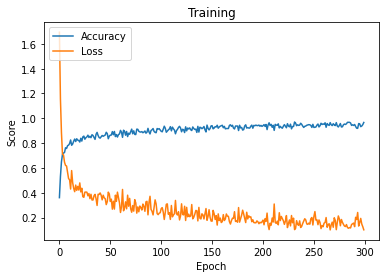

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Training')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

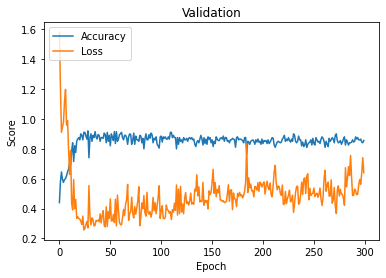

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Validation')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()